## Açıklayıcı Veri Analizi Nedir? 

Açıklayıcı veri analizi (Exploratory data analysis - EDA), istatistik ve olasılık teorisinden basit kavramları kullanarak verileri analiz etme ve sonuçları kolay anlaşılır bir şekilde görsellikle destekleyen bir formatta sunma sürecidir.
Kısacası, bir veri seti üzerinde Sherlock Holmes gibi iz sürmek denilebilir!


İris çiçeği veri seti (`iris.csv`), iris çiçeklerinin üç türünün her birini içeren 50 numuneden oluşmaktadır: Iris Setosa, Iris Virginica ve Iris Versicolor. İris çiçeği veri seti, İngiliz istatistikçi ve biyolog Ronald Fisher tarafından 1936 tarihli “Taksonomik problemlerde çoklu ölçümlerin kullanımı” başlıklı makalesinde tanıtıldı.

İris verileri çok değişkenli bir veri kümesidir. Her bir numuneden ölçülen dört özellik, santimetre cinsinden — çanak yaprağı uzunluğu (*sepal length*), çanak yaprağı genişliği (*sepal width*), taç yaprağı uzunluğu (*petal length*) ve taç yaprağı genişliğidir (*petal width*).

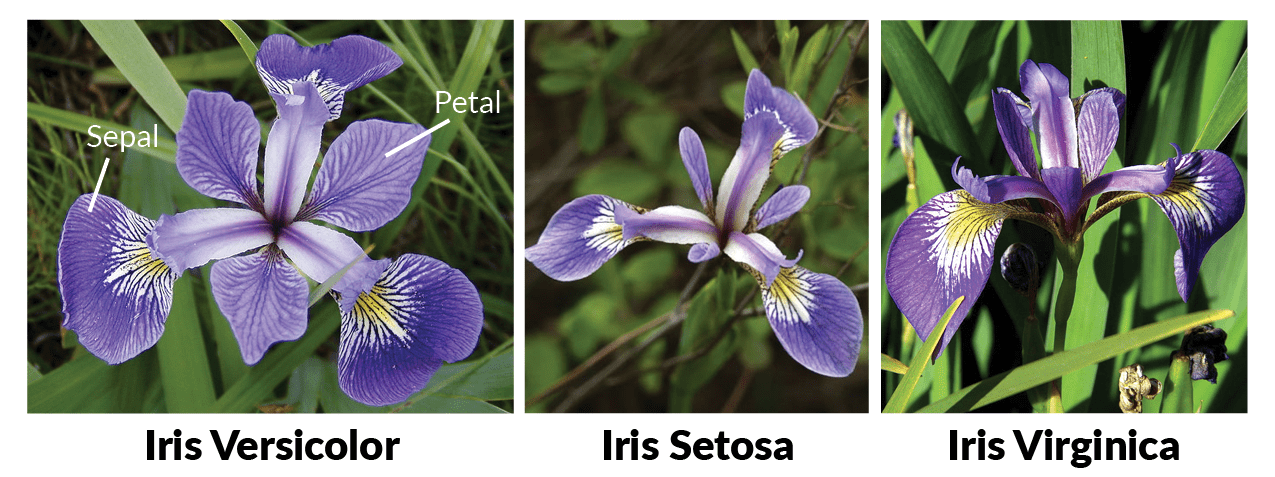

İris çiçeği verileri herkesin kullanımına açıktır. Çoğunlukla Veri Bilimi ve Makine Öğrenmesi alanına yeni başlayanlar tarafından en yaygın kullanılan veri kümelerinden biridir. Bu veri seti, California-Irvine Üniversitesi   [arşivlerinden](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data) indirilebilmektedir. 

Makine öğrenmesi terminolojisinde çanak yaprağı uzunluğu, çanak yaprak genişliği, taç yaprağı uzunluğu ve taç yaprağı genişliği gibi gözlemlenen özellikler bağımsız değişkenler, belirlenecek çiçek sınıfı etiketi ise (Setosa, Virginica ve Versicolor) bağımlı değişken olarak adlandırılır.

Bu veri setini kullanmamızdaki **amaç**; çanak yaprak uzunluğu, çanak yaprak genişliği, taç yaprak uzunluğu ve taç yaprak genişliği göz önüne alındığında, seçilen numunenin iris çiçeğinin üç türünden biri olan Setosa, Virginica ve Versicolor olarak sınıflandırılmasıdır. 

## Temel İstatistiksel Analiz - Merkezi Eğilim ve Verilerin Yayılması

Gerekli tüm Python kitaplıklarını içe aktaralım ve grafikler için sabit parametreleri belirleyelim: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

İris veri seti, .csv formatında saklanır.

.csv dosyalarını Pandas veri çerçevesi olarak yüklemek ve üzerinde çeşitli analitik işlemler gerçekleştirmek daha kolaydır.


In [2]:
iris = pd.read_csv('iris.csv')
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Veri setinde bulunan farklı çiçek türlerinin özniteliklerinin ortalamasını ve medyanını hesaplayalım:

In [3]:
iris.groupby('species').agg(['mean', 'median'])

sepal length (cm)        sepal width (cm)        petal length (cm)  \
                        mean median             mean median              mean   
species                                                                         
setosa                 5.006    5.0            3.418    3.4             1.464   
versicolor             5.936    5.9            2.770    2.8             4.260   
virginica              6.588    6.5            2.974    3.0             5.552   

                  petal width (cm)         
           median             mean median  
species                                    
setosa       1.50            0.244    0.2  
versicolor   4.35            1.326    1.3  
virginica    5.55            2.026    2.0

Tüm  çiçek türleri için, özniteliklerin ortalamasının ve medyanının oldukça yakın olduğu görülmektedir. Bu, verilerin neredeyse simetrik olarak dağıldığını ve çok daha az aykırı (outlier) değer bulunduğunu gösterir. **Kutu grafiği (Box plot)** (daha sonra açıklanacaktır), verilerde aykırı değer tespiti için kullanılan en iyi istatistiksel araçlardan biridir.

Her bir çiçek türünün öznitelikleri için standart sapmayı belirleyelim. 

In [4]:
iris.groupby('species').std()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,0.352490,0.381024,0.173511,0.107210
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


Standart sapma (veya varyans), verilerin ortalama değer civarında ne kadar geniş yayıldığının bir göstergesidir.

## Kutu Grafiği (Box Plot)

Kutu (box) ya da yatay çizgi (whisker) grafiği olarak bilinen bu grafik biçimi, geniş veri setlerinin özetini beş ayrı değer ile gösterir:  minimum değer, alt çeyreklik (%25'lik  dilim - 25th quartile), medyan (% 50'lik dilim), üst çeyreklik (%75'lik dilim) ve maksimum değer.

Seaborn kitaplığını kullanarak, iris veri setindeki çiçek türlerine ait kutu grafiklerini çizdirelim.

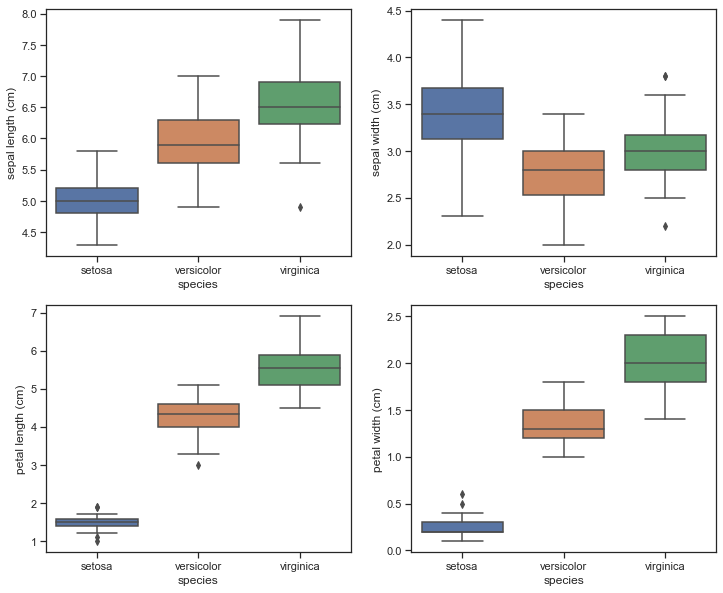

In [5]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal length (cm)',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal width (cm)',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal length (cm)',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal width (cm)',data=iris)
plt.show()

Yukarıdaki kutu grafiklerinde görülebilen izole noktalar, verilerdeki aykırı değerlerdir. Bunlar sayıca çok az olduğundan, analizimiz üzerinde önemli bir etkisi olmayacaktır.

## Keman Grafiği (Violin Plot) 

Bir keman grafiği, kutu grafiğine benzer bir rol oynar. Verilerin, bir (veya daha fazla) kategorik değişkenin (bizim durumumuzda çiçek türleri) dağılımını gösterir, böylece bu dağılımlar karşılaştırılabilir. Keman grafiğinin ortasındaki çizgide de, verilerin noktalar halinde nerelerde yoğunlaştığı görülebilmektedir. 

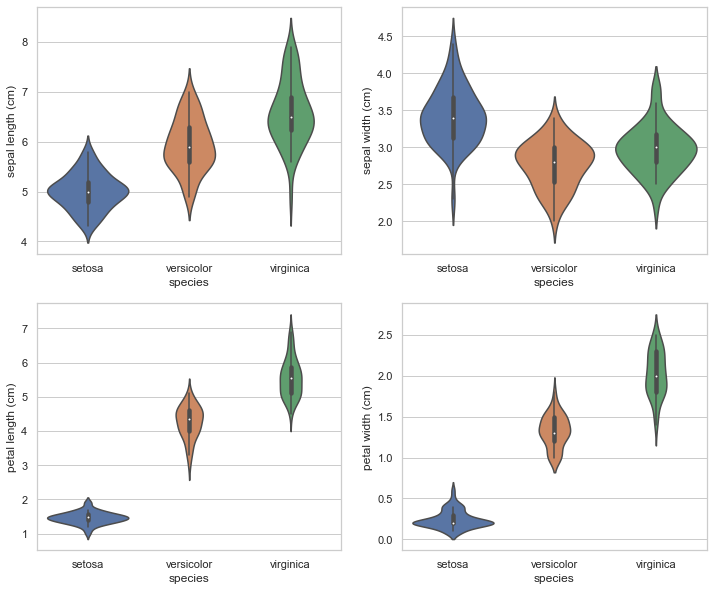

In [6]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal length (cm)',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal width (cm)',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal length (cm)',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal width (cm)',data=iris)
plt.show()

Keman grafikleri, istatistiksel olarak verilerin altta yatan dağılımını da temsil ettiğinden, kutu grafiklerine kıyasla daha bilgilendiricidir.

Veri çerçevesinin boyutlarını bulmak için `shape` fonksiyonunu kullanalım. Veri setimizde 150 satır / kayıt ve 5 sütun / öznitelik olduğunu göreceğiz.

In [7]:
iris.shape

(150, 5)

Ortalama, medyan, mod, standart sapma vb. gibi veri kümesine ait temel istatistiklerini görmek için `describe()` fonksiyonunu kullanabiliriz. 

In [8]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Özniteliklerin hangi veri türlerinde olduğunu belirlememiz gerekmektedir. Bunun için `info()` fonksiyonunu kullanabiliriz. species sütununun nesne/kategori veri türünde olduğunu, diğer sütunların ise ondalık sayılardan (float) meydana geldiğiniz görebilmekteyiz.

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Veri kümesinde null / NaN değer olup olmadığını görelim. Herhangi bir null değer varsa, aşağıdaki adımlardan birini izlememiz gerekir: 
* null değerleri olduğu gibi bırakmak
* null değerlerin olduğu sütunun / özniteliğin ortalama değerini, null değerler yerine yerleştirmek
* null değerleri, "?" ya da "-9999" değerleri ile değiştirmek



In [10]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Burada, veri Kümemizde null değer olmadığını açıkça görebilmekteyiz.

Şimdi sayısal öznitelikler arasındaki ilişkiyi anlamak için verilerimizi görselleştireceğiz.

Çizim için seaborn kütüphanesini kullanalım

X ve Y eksenindeki 2 öznitelik arasındaki ilişkiyi analiz ederken saçılım grafiği (scatter plot) oldukça kullanışlıdır.

Seaborn kütüphanesinde, tüm öznitelikleri karşılaştıran grafikleri tek tek çizmek yerine, tek seferde bu çizimlerin tamamını `pairplot()` fonksiyonu ile gerçekleştirebiliriz. 

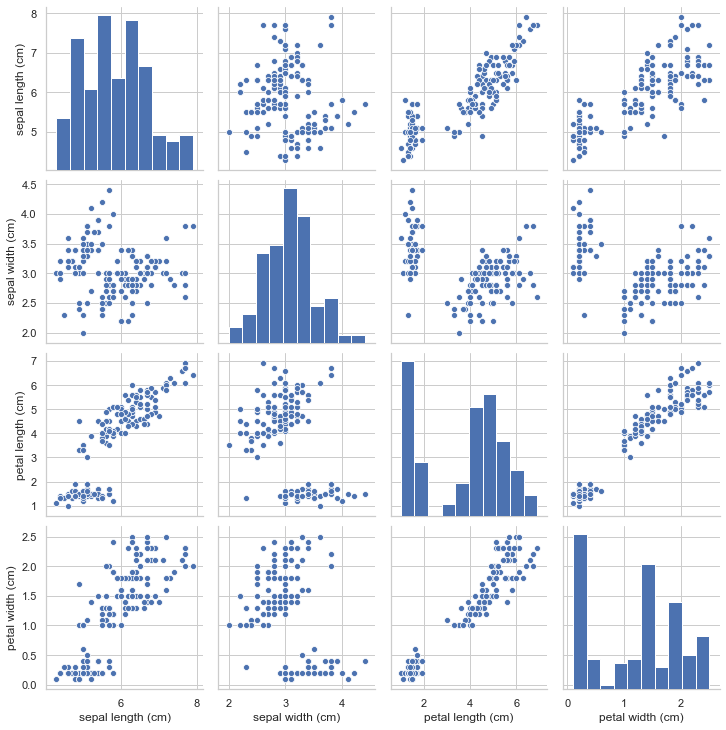

In [11]:
sns.pairplot(iris)

Şimdi, bu özniteliklerin, seaborn kütüphanesindeki ısı haritası çizdirme (heatmap) özelliğini kullanarak birbirleriyle nasıl ilişkilendirildiğini göreceğiz.

Örneğin, Çanak yaprak uzunluğu (sepal length) ve çanak yaprak genişliği (sepal width) özniteliklerinin birbiriyle biraz daha az ilişkili olduğunu görebiliriz.

[]

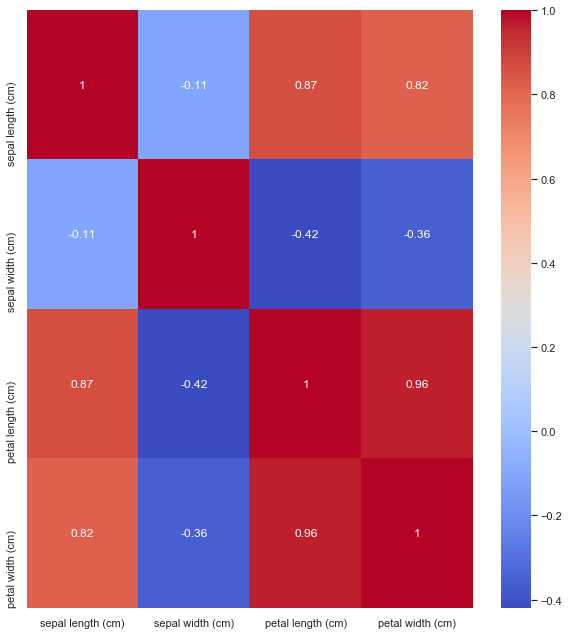

In [12]:
plt.figure(figsize=(10,11))
sns.heatmap(iris.corr(),annot=True, cmap="coolwarm")
plt.plot()

Saçılım grafiğini kullanarak, verilerimizin çanak yaprak uzunluk ve genişlik özniteliklerine göre nasıl dağıldığını görelim.

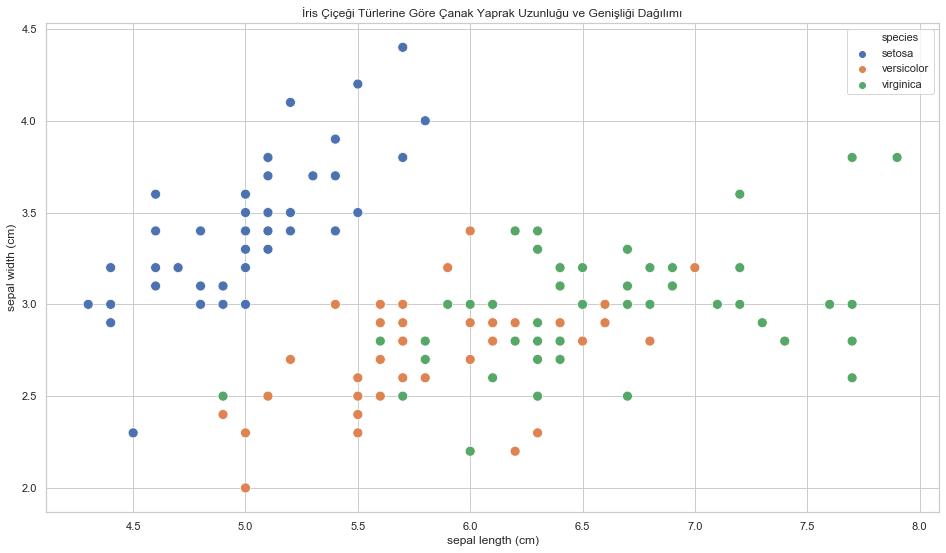

In [13]:
plt.figure(figsize=(16,9))
plt.title('İris Çiçeği Türlerine Göre Çanak Yaprak Uzunluğu ve Genişliği Dağılımı')
sns.scatterplot(iris['sepal length (cm)'], iris['sepal width (cm)'], hue = iris['species'], s= 100);

Yukarıdaki görselleştirmeden iris-setosa türlerinin daha küçük çanak yaprak uzunluğuna, ancak daha yüksek genişliğe sahip olduğunu söyleyebiliriz. iris-versicolor türlerinin hem uzunluk hem de genişlik açısından neredeyse ortada bir yerde görüyoruz. iris-virginica türleri ise daha büyük çanak yaprak uzunluğuna ve daha genişliğe sahiptir.

Taç yaprak uzunluk ve genişlik özniteliklerine dayalı olarak benzer şekilde dağılım grafiğini çizdirelim.

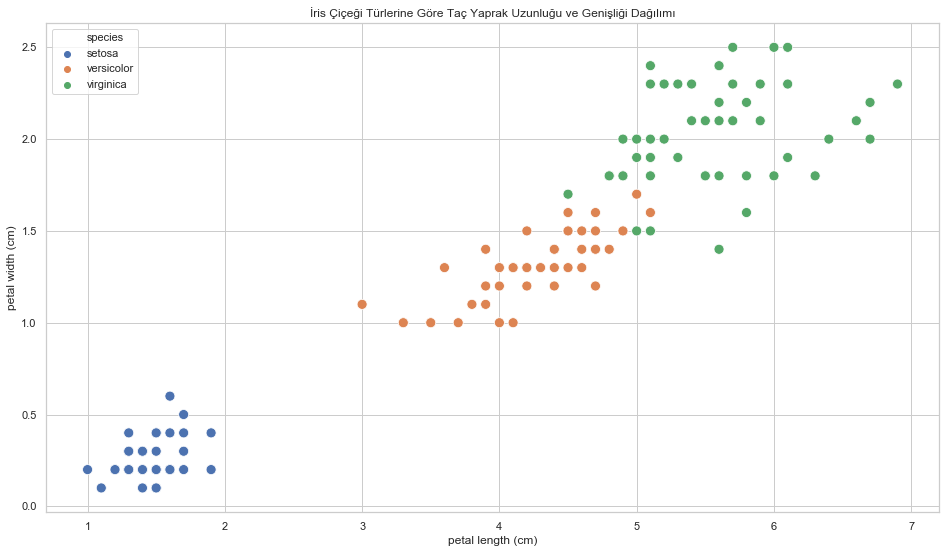

In [14]:
plt.figure(figsize=(16,9))
plt.title('İris Çiçeği Türlerine Göre Taç Yaprak Uzunluğu ve Genişliği Dağılımı')
sns.scatterplot(iris['petal length (cm)'], iris['petal width (cm)'], hue = iris['species'], s= 100);

Setosa'nın en küçük taç yaprak genişliğine ve uzunluğuna sahip olduğunu; Versicolor'un ortalama taç yaprak uzunluğuna ve  genişliğine sahip olduğunu, virginica türünün ise en yüksek taç yaprak uzunluğuna ve genişliğine sahip olduğunu görüyoruz.

Şimdi pairplot grafiklerini kullanarak tüm sütunların çiçek türüne göre ilişkisini görselleştirelim.

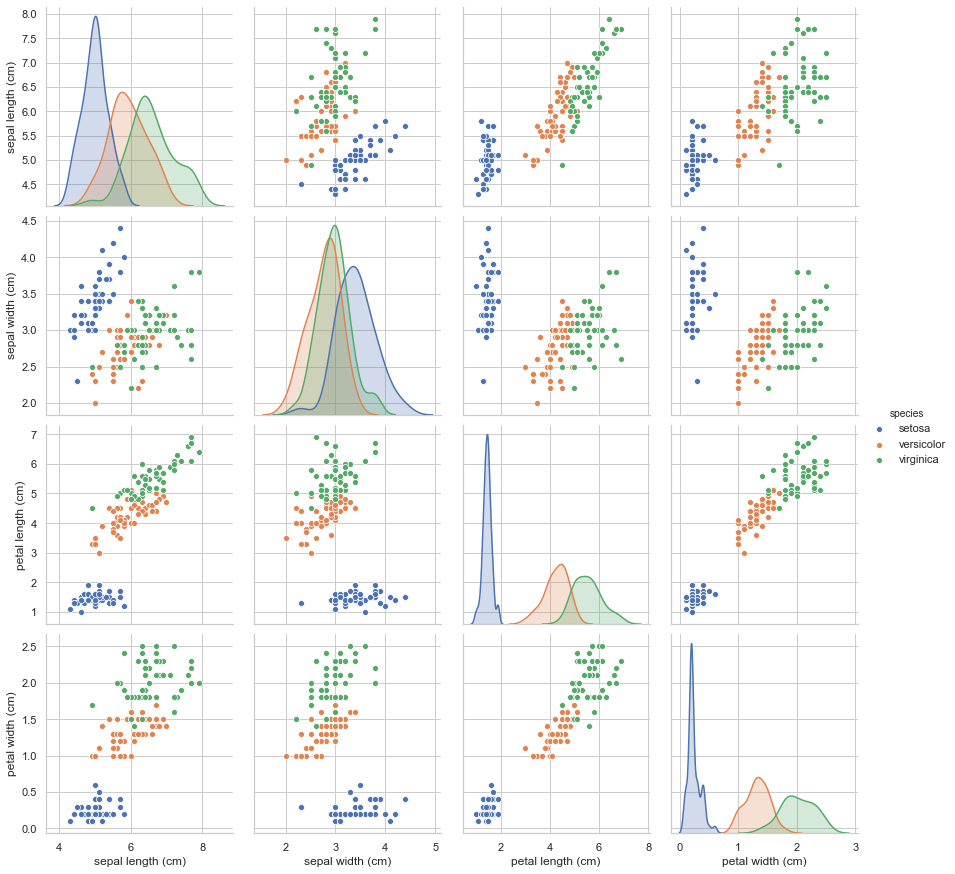

In [15]:
sns.pairplot(iris,hue="species",height=3);

Pairplot grafiği, hedefimiz olan çiçek türleri ve değişkenler arasındaki ilişkiyi temsil eder. Setosa türünün sahip olduğu özelliklerin, diğer türlere göre çok daha büyük bir farka sahip olduğunu, taç yaprak genişliği ve uzunluğunun daha küçük, çanak yaprak genişliğinin yüksek ve çanak yaprak uzunluğunun az olduğunu görebiliriz. Versicolor türü için de benzer türden sonuçlar çıkarılabilir. Versicolor türü çiçekler, ister çanak ister taç yaprak olsun, genellikle ortalama yaprak boyutlarına sahiptir. Virginica, daha fazla taç yaprak genişliğine ve uzunluğuna sahipken, daha küçük çanak yaprak genişliğine, ancak daha büyük çanak yaprak uzunluğuna sahiptir.

Veri setimizin çeşitli sütunları için verilerin dağılımını görelim.

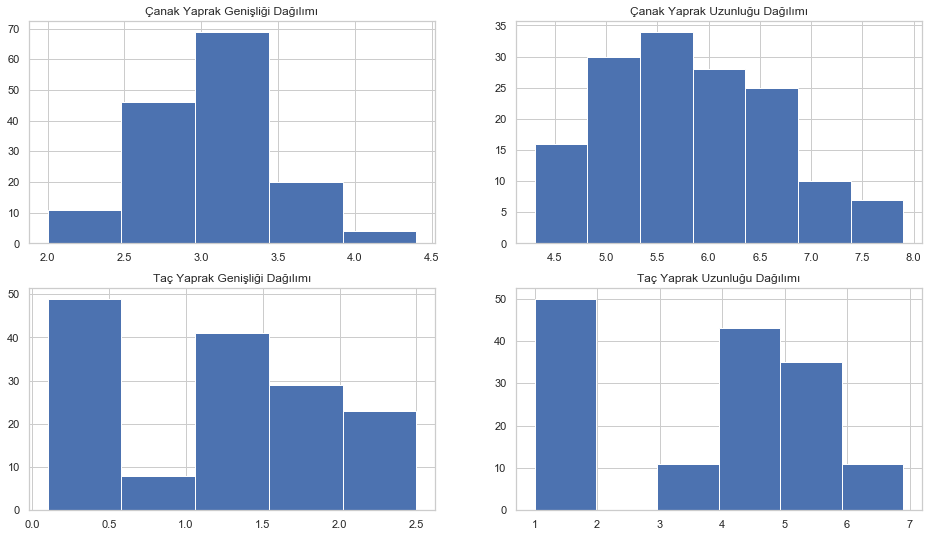

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Çanak Yaprak Genişliği Dağılımı")
axes[0,0].hist(iris['sepal width (cm)'], bins=5);
axes[0,1].set_title("Çanak Yaprak Uzunluğu Dağılımı")
axes[0,1].hist(iris['sepal length (cm)'], bins=7);
axes[1,0].set_title("Taç Yaprak Genişliği Dağılımı")
axes[1,0].hist(iris['petal width (cm)'], bins=5);
axes[1,1].set_title("Taç Yaprak Uzunluğu Dağılımı")
axes[1,1].hist(iris['petal length (cm)'], bins=6);


*   En yüksek çanak yaprak genişlik frekansı 3.0 ile 3.5 cm arasındadır ve 70 civarındadır.
*   En yüksek çanak yaprak uzunluk frekansı 5.5 ile 6.0 cm arasındadır ve bu da 35 civarındadır.
*   En yüksek taç yaprağı genişliği frekansı 0 ile 0.5 cm arasındadır ve bu da 50 civarındadır.
*   Taç yaprak uzunluğunun en yüksek frekansı, 50 civarında olan 0 ile 0.5 cm arasındadır.

## Sütunların Tek Değişkenli Analizi (Uni-Variate Analysis)

Her çiçek türünü, her bir öznitelik (değişken) için tek tek analiz edelim. Bunun için seaborn kütüphanesinin yüzey grafiği (FacetGrid) oluşturma seçeneğini kullanalım. Bu grafikler ile bir özniteliğin farklı kategorik verilerde (çiçek türleri) nasıl dağıldığını gözlemleyebilmekteyiz. İlk örnekte taç yaprağı genişliğinin, tüm çiçek türlerinde nasıl dağıldığını inceleyelim.


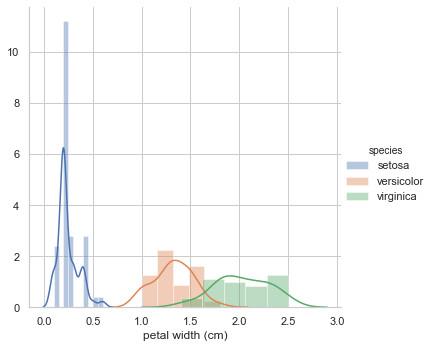

In [17]:
sns.FacetGrid(iris,hue="species",height=5).map(sns.distplot,"petal width (cm)").add_legend();

Taç yaprak genişliği özniteliğinin, versicolor ve virginica türlerinin bazı kısımlarında bir araya geldiğini, ancak setosa türünde kolayca ayrılabildiğini görüyoruz. Aynısını taç yaprak uzunluğu özniteliği için de yapalım. 

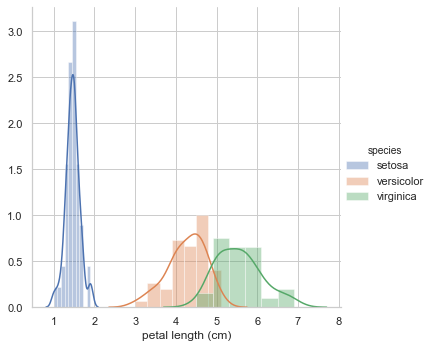

In [18]:
sns.FacetGrid(iris,hue="species",height=5).map(sns.distplot,"petal length (cm)").add_legend();

Yine, taç yaprak uzunluğu özniteliği baz alındığında da, diğer iki çiçek türü hala üst üste binerken, setosa türünün ayrılabilir olduğunu görüyoruz. Çanak yaprak uzunluğu ile devam edelim. 

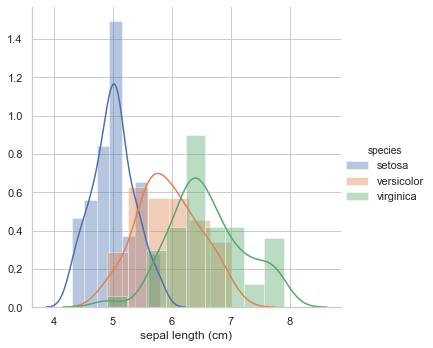

In [19]:
sns.FacetGrid(iris,hue="species",height=5).map(sns.distplot,"sepal length (cm)").add_legend();

Çiçek türlerini yalnızca çanak yaprak uzunluğu temelinde ayırmanın oldukça zor olduğunu görüyoruz.

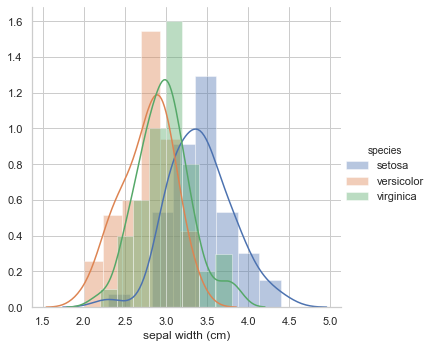

In [20]:
sns.FacetGrid(iris,hue="species",height=5).map(sns.distplot,"sepal width (cm)").add_legend();

Çanak yaprağı genişliği durumunda çiçek türlerinin daha yoğun olarak örtüştüğünü görebilmekteyiz. 

## Sonuçlar

Veri kümesi dengelidir, yani her üç tür için eşit kayıtlar mevcuttur.

Dört sayısal veri barındıran sütunumuz varken, analiz etmeyi hedeflediğimiz veri olan sadece bir kategorik sütunumuz vardır (çiçek türleri). 

Taç yaprak genişliği ile taç yaprak uzunluğu arasında güçlü bir korelasyon mevcuttur.

Setosa türleri, küçük boyutlu olmasından dolayı  dolayı en kolay ayırt edilebilen türdür.

Versicolor ve Virginica türleri genellikle karıştırılır ve bazen ayrılması zordur. Ancak genellikle Versicolor türünün boyutları daha ortalama değerdedir. Buna karşın virginica türünün boyutları daha büyüktür.